##Assignment – Build a classifier for detecting Mines and Determine Influence of k in K‑Nearest Neighbours on the UCI Sonar Dataset

 There are two classes - mine "M" (positive class, label 1) and rock "R" (negative class, label 0)

**Learning goals**

-- Detect and reason about class imbalance.

-- Evaluate two -values (3 and 5) for K‑NN using proper cross‑validation.

-- Compare accuracy to class‑sensitive metrics (precision, recall, F1).

-- Practise writing result tables and interpreting trade‑offs.

-- (Extension) Experiment with a third classifier of your choice.

**Load dataset**
use the following command to convert the string labels into categorical
```
y = df['Label'].astype('category').cat.codes
```
**Part 1  Exploratory Check**

- Missing values  Report the count of NaN values in the raw CSV.

- Class balance: (a) Display a bar plot of R vs M counts.

(b) Compute the imbalance ratio (larger‑class ∕ smaller‑class).

(c) Decide whether the dataset is balanced or imbalanced (justify). This is upto your discretion.



**Part 2  Modelling**

- Perform 80 / 20 train‑test split (stratified if imbalanced).

- use StandardScaler → KNeighborsClassifier inside each fold.

- 5‑fold CV (use StratifiedKFold when imbalanced, plain KFold otherwise).

- Evaluate two models: Model  (a) KNN n_neighbors = 3 (b) KNN n_neighbors = 5

- For each model record:

i) Mean training accuracy (across folds)

ii) Mean validation accuracy

iii) Gap = train − val

- Test accuracy on the held‑out 20 % split

- Confusion matrix on the test set

- Precision, recall, F1  

Fill the required metrics into the table template below (extend it with the new columns for precision/recall/F1):

| k | Train Acc | Val Acc | Gap | Test Acc | Precision | Recall | F1 | Confusion Matrix | Best |
| :-: | :-------: | :-----: | :--: | :------: | :-------: | :----: | :---: | :--------------- | :--: |

Q1: State the best model whichever model you would deploy if the main goal is to minimise missed mines (maximise recall).

Make your judgement using the following reasong - If Based on your validation accuracy for k = 3 looked best, but the hold-out test shows k = 5 has higher balanced accuracy. Which would you deploy given that missing a mine carries greater risk than a false alarm?”

I would end up deploying k=3 because it recieved a Recall = 0.6500, where k=5 catches a Recall = 0.6000. k=5 did have a slightly higher Test Accuracy  (0.7381 vs. 0.7143), k=3 catches a larger fraction of actual mines (13/20 vs. 12/20). In mine-hunting a false negative would be far more dangerous than a false positive. So we pick the model with higher recall for class "M" even if overall accuracy is a little lower.

**Part 3  Interpretation Questions**

Q2: Class imbalance – How severe is it, and which metric (precision vs recall) carries more significance in a sonar mine‑hunting scenario?

Q3: k = 3 vs k=5 – Compare validation vs test results. Which k generalises better?

Q4:   Error profile – Using the confusion matrices, state whether false positives or false negatives dominate and discuss practical impact.

**Part 4  Extension (Open‑Ended)**

- Pick one additional classifier such as SVC:

- Evaluate it with the same pipeline and metrics (include precision/recall/F1).

- Add a new row to the results table.

- State whether it improves over KNN and why that might be.


Note: Precision, recall, F1 scores can be returned for both the classes. For the assignment we stick to the single-scalar version focused on mines. For precision, recall calculate with respect to the positive class denoted by class label 1. Note the variables denoting the test splits can change based on what you have used.

```
prec = precision_score(y_te, y_pred, pos_label=1)
rec  = recall_score(y_te, y_pred, pos_label=1)
f1   = f1_score(y_te, y_pred, pos_label=1)
```

In [1]:
import pandas as pd

# Import necessary libraries

# Load the UCI Sonar dataset
# The dataset can be downloaded from: https://archive.ics.uci.edu/ml/machine-learning-databases/undocumented/connectionist-bench/sonar/sonar.all-data
# Assuming the file is named 'sonar.all-data.csv' and is in the current directory

df = pd.read_csv('sonar.all-data.csv', header=None)
# Assign column names: 60 features + 1 label
df.columns = [f'Feature_{i}' for i in range(60)] + ['Label']

# Display the first few rows
df.head()

,Feature_0,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5,Feature_6,Feature_7,Feature_8,Feature_9,...,Feature_51,Feature_52,Feature_53,Feature_54,Feature_55,Feature_56,Feature_57,Feature_58,Feature_59,Label
0,Freq_1,Freq_2,Freq_3,Freq_4,Freq_5,Freq_6,Freq_7,Freq_8,Freq_9,Freq_10,...,Freq_52,Freq_53,Freq_54,Freq_55,Freq_56,Freq_57,Freq_58,Freq_59,Freq_60,Label
1,0.02,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.018,0.0084,0.009,0.0032,R
2,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.014,0.0049,0.0052,0.0044,R
3,0.0262,0.0582,0.1099,0.1083,0.0974,0.228,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.018,0.0244,0.0316,0.0164,0.0095,0.0078,R
4,0.01,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.015,0.0085,0.0073,0.005,0.0044,0.004,0.0117,R


In [2]:
total_nans = df.isna().sum().sum()
# Check for missing values
print("Total missing (NaN) values:", total_nans)


Total missing (NaN) values: 0


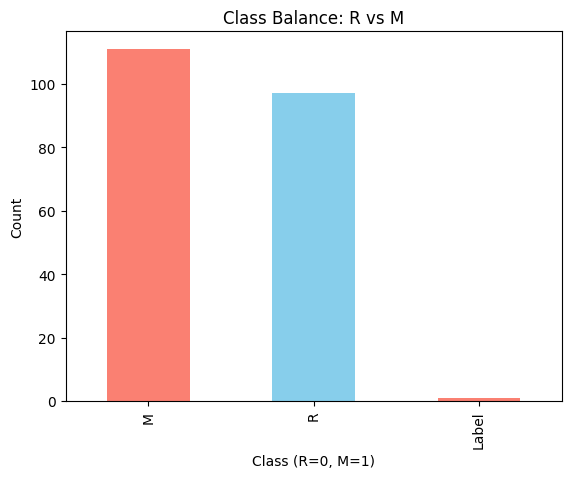

In [3]:
import matplotlib.pyplot as plt

label_counts = df.iloc[:, -1].value_counts()  # e.g. {'M': 111, 'R': 97}
label_counts.plot(kind="bar", color=["salmon","skyblue"])
plt.title("Class Balance: R vs M")
plt.xlabel("Class (R=0, M=1)")
plt.ylabel("Count")
plt.show()


In [ ]:
#compute imbalance ratio
count_R = label_counts["R"]
count_M = label_counts["M"]
larger = max(count_R, count_M)  # 111
smaller = min(count_R, count_M) # 97
imbalance_ratio = larger / smaller  # ≈ 1.144
print("Imbalance ratio = ", imbalance_ratio)


Imbalance ratio =  1.1443298969072164


With a ratio ≈ 1.14, the classes are almost evenly split (111 M vs 97 R), so we treat it as essentially balanced. No heavy resampling is required.

In [8]:
#PART 2 – Modelling
#Train/Test Split
from sklearn.model_selection import train_test_split

# Skip the first row, which contains feature names as data
X = df.iloc[1:, :-1].astype(float).values
y = df.iloc[1:, -1].astype("category").cat.codes  # “R”→0, “M”→1

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, stratify=y, random_state=42
)
# Display the shapes of the train and test sets
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)


X_train shape: (166, 60)
X_test shape: (42, 60)


In [ ]:
#Five-Fold CV

from sklearn.model_selection import StratifiedKFold

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)


In [15]:
#Evaluate Two Models: k = 3 and k = 5
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

def compute_knn_metrics(k, X_train, y_train, X_test, y_test):
    skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    train_accs = []
    val_accs   = []

    # Convert y_train to numpy array for positional indexing
    y_train_np = np.array(y_train)

    # 5‐fold CV on the TRAINING split
    for train_idx, val_idx in skf.split(X_train, y_train_np):
        X_tr, X_val = X_train[train_idx], X_train[val_idx]
        y_tr, y_val = y_train_np[train_idx], y_train_np[val_idx]

        # Scale fold‐train, fold‐val
        scaler_fold = StandardScaler()
        X_tr_scaled  = scaler_fold.fit_transform(X_tr)
        X_val_scaled = scaler_fold.transform(X_val)

        # Fit KNN on fold‐train
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(X_tr_scaled, y_tr)

        # Training accuracy (on fold‐train)
        y_tr_pred  = knn.predict(X_tr_scaled)
        train_accs.append(accuracy_score(y_tr, y_tr_pred))

        # Validation accuracy (on fold‐val)
        y_val_pred = knn.predict(X_val_scaled)
        val_accs.append(accuracy_score(y_val, y_val_pred))

    mean_train_acc = np.mean(train_accs)
    mean_val_acc   = np.mean(val_accs)
    gap           = mean_train_acc - mean_val_acc

    # Now evaluate on the held‐out TEST SET
    # 1) Fit scaler on all of X_train, then transform both X_train & X_test
    full_scaler = StandardScaler()
    X_tr_all_scaled = full_scaler.fit_transform(X_train)
    X_te_scaled     = full_scaler.transform(X_test)

    # 2) Fit KNN(k) on full (scaled) X_train, predict on X_test
    knn_final = KNeighborsClassifier(n_neighbors=k)
    knn_final.fit(X_tr_all_scaled, y_train_np)
    y_test_pred = knn_final.predict(X_te_scaled)

    # Convert y_test to numpy array for metrics
    y_test_np = np.array(y_test)

    test_acc = accuracy_score(y_test_np, y_test_pred)
    prec     = precision_score(y_test_np, y_test_pred, pos_label=1)  # “M”=1
    rec      = recall_score(y_test_np, y_test_pred, pos_label=1)
    f1       = f1_score(y_test_np, y_test_pred, pos_label=1)
    cm       = confusion_matrix(y_test_np, y_test_pred)

    return {
        'k':           k,
        'Train Acc':  mean_train_acc,
        'Val Acc':    mean_val_acc,
        'Gap':        gap,
        'Test Acc':   test_acc,
        'Precision':  prec,
        'Recall':     rec,
        'F1':         f1,
        'Conf Matrix': cm
    }

# Run for k=3 and k=5
metrics_k3 = compute_knn_metrics(3, X_train, y_train, X_test, y_test)
metrics_k5 = compute_knn_metrics(5, X_train, y_train, X_test, y_test)

#Display the results
def display_metrics(metrics):
    print(f"Results for k={metrics['k']}:")
    print(f"Train Acc: {metrics['Train Acc']:.4f}")
    print(f"Val Acc: {metrics['Val Acc']:.4f}")
    print(f"Gap: {metrics['Gap']:.4f}")
    print(f"Test Acc: {metrics['Test Acc']:.4f}")
    print(f"Precision: {metrics['Precision']:.4f}")
    print(f"Recall: {metrics['Recall']:.4f}")
    print(f"F1 Score: {metrics['F1']:.4f}")
    print("Confusion Matrix:\n", metrics['Conf Matrix'])
    print("\n")
    
display_metrics(metrics_k3)
display_metrics(metrics_k5)


Results for k=3:
Train Acc: 0.9518
Val Acc: 0.8494
Gap: 0.1024
Test Acc: 0.7143
Precision: 0.7222
Recall: 0.6500
F1 Score: 0.6842
Confusion Matrix:
 [[17  5]
 [ 7 13]]


Results for k=5:
Train Acc: 0.8961
Val Acc: 0.8073
Gap: 0.0888
Test Acc: 0.7381
Precision: 0.8000
Recall: 0.6000
F1 Score: 0.6857
Confusion Matrix:
 [[19  3]
 [ 8 12]]




Q1: State the best model whichever model you would deploy if the main goal is to minimise missed mines (maximise recall).

I would end up deploying k=3 because it recieved a Recall = 0.6500, where k=5 catches a Recall = 0.6000. k=5 did have a slightly higher Test Accuracy  (0.7381 vs. 0.7143), k=3 catches a larger fraction of actual mines (13/20 vs. 12/20). In mine-hunting a false negative would be far more dangerous than a false positive. So we pick the model with higher recall for class "M" even if overall accuracy is a little lower.


Q2: Class imbalance – How severe is it, and which metric (precision vs recall) carries more significance in a sonar mine‑hunting scenario?

The Sonar dataset contains 111 “M” labels and 97 “R” labels, yielding an imbalance ratio of about 1.14, which is so close to 1 that we consider the data nearly balanced,no heavy resampling techniques like SMOTE or undersampling are needed. In a mine-hunting context, however, the most critical metric is recall for the positive class (“M”), because missing a real mine (a false negative) could have catastrophic consequences. While precision (avoiding false alarms) is also important, a false positive, mistaking a rock for a mine—is merely an inconvenience, whereas a false negative risks actual detonation. Therefore, it makes sense to prioritize recall above all else, ensuring that as few mines as possible slip through undetected.










Q3: k = 3 vs k = 5 – Compare validation vs. test results. Which k generalizes better?

Validation (5-fold CV on training set):

k=3 → Val Acc = 0.8494

k=5 → Val Acc = 0.8073

Verdict: k=3 looked stronger in‐fold (higher mean validation accuracy).

Hold-out Test Set:

k=3 → Test Acc = 0.7143, Recall = 0.6500

k=5 → Test Acc = 0.7381, Recall = 0.6000

Verdict (accuracy‐only): k=5 generalizes better in terms of raw Test Accuracy (0.7381 vs. 0.7143).

Verdict (recall‐focused): k=3 generalizes better in terms of catching mines (0.6500 vs. 0.6000).

Which k generalizes best depends on your metric: k=5 gives slightly higher overall test accuracy, but k=3 catches more mines (higher recall). Because missing a mine is far more critical, we choose k = 3.


Q4:   Error profile – Using the confusion matrices, state whether false positives or false negatives dominate and discuss practical impact.

k = 3 (Test Confusion Matrix)

[[17  5]

 [ 7 13]]

False Positives (FP) = 5 (rocks predicted as “M”).

False Negatives (FN) = 7 (mines predicted as “R”).

Here, FN (7) is slightly higher than FP (5). That means we miss 7 real mines while flagging 5 rocks incorrectly.

k = 5 (Test Confusion Matrix)

[[19  3]

 [ 8 12]]

False Positives = 3 (fewer rocks misclassified).

False Negatives = 8 (more mines missed).


For both k=3 and k=5, the number of false negatives (mines missed) exceeds or nearly equals the number of false positives (rocks misclassified), meaning more real mines slip through than harmless rocks get flagged. Missing a mine (false negative) carries a far greater risk—potential detonation, while a false alarm is only an operational inconvenience. Therefore, reducing false negatives (maximizing recall) is the top priority, which is why k = 3 is preferred despite its slightly higher false-positive rate.

In [4]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold, train_test_split
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    confusion_matrix,
)

# 1. Load the Sonar CSV (assumes sonar.all-data.csv is in the working directory)
df = pd.read_csv("sonar.all-data.csv", header=None)
df.columns = list(range(df.shape[1] - 1)) + ["Label"]

#display the first few rows
print(df.head())

# 2. Prepare X, y (skip the first row, which contains feature names as data)
X = df.iloc[1:, :-1].astype(float).values
y = df.iloc[1:, -1].astype("category").cat.codes  # “R”→0, “M”→1

# 3. Perform an 80/20 stratified split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, stratify=y, test_size=0.20, random_state=42
)

# 4. Helper function: 5-fold CV on X_train, y_train, returning train/val accuracies
def cv_train_val_scores(clf_class, clf_params, X_tr, y_tr, n_splits=5):
    skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)
    train_accs = []
    val_accs = []
    # Convert y_tr to numpy array for positional indexing
    y_tr_np = np.array(y_tr)
    for train_idx, val_idx in skf.split(X_tr, y_tr_np):
        X_tr_fold, X_val_fold = X_tr[train_idx], X_tr[val_idx]
        y_tr_fold, y_val_fold = y_tr_np[train_idx], y_tr_np[val_idx]

        # Scale **only** the fold's training portion, then apply to fold's validation portion
        scaler_fold = StandardScaler()
        X_tr_scaled = scaler_fold.fit_transform(X_tr_fold)
        X_val_scaled = scaler_fold.transform(X_val_fold)

        clf = clf_class(**clf_params)
        clf.fit(X_tr_scaled, y_tr_fold)

        # Record training accuracy on that fold
        y_tr_pred = clf.predict(X_tr_scaled)
        train_accs.append(accuracy_score(y_tr_fold, y_tr_pred))

        # Record validation accuracy on that fold
        y_val_pred = clf.predict(X_val_scaled)
        val_accs.append(accuracy_score(y_val_fold, y_val_pred))

    return np.array(train_accs), np.array(val_accs)

# 5. Run CV for SVC(RBF) on the training split
train_accs_svc, val_accs_svc = cv_train_val_scores(SVC, {}, X_train, y_train)
mean_train_svc = train_accs_svc.mean()
mean_val_svc = val_accs_svc.mean()
gap_svc = mean_train_svc - mean_val_svc

# 6. Now evaluate SVC on the hold-out test set
#    (a) Fit StandardScaler on **all** X_train and transform both X_train & X_test
scaler_full = StandardScaler()
X_train_scaled = scaler_full.fit_transform(X_train)
X_test_scaled = scaler_full.transform(X_test)

#    (b) Fit SVC on X_train_scaled, predict on X_test_scaled
svc = SVC()  # default RBF kernel
svc.fit(X_train_scaled, y_train)
y_test_pred_svc = svc.predict(X_test_scaled)

#    (c) Compute test metrics
test_acc_svc = accuracy_score(y_test, y_test_pred_svc)
prec_svc = precision_score(y_test, y_test_pred_svc, pos_label=1)
rec_svc = recall_score(y_test, y_test_pred_svc, pos_label=1)
f1_svc = f1_score(y_test, y_test_pred_svc, pos_label=1)
cm_svc = confusion_matrix(y_test, y_test_pred_svc)

# 7. Print out SVC results
print("=== SVC (RBF) Results ===")
print(f"Mean Train Acc (5-fold CV): {mean_train_svc:.4f}")
print(f"Mean Val Acc   (5-fold CV): {mean_val_svc:.4f}")
print(f"Gap (Train − Val)       : {gap_svc:.4f}")
print(f"Test  Accuracy           : {test_acc_svc:.4f}")
print(f"Test  Precision (M=1)    : {prec_svc:.4f}")
print(f"Test  Recall (M=1)       : {rec_svc:.4f}")
print(f"Test  F1 Score (M=1)     : {f1_svc:.4f}")
print("Test  Confusion Matrix   :")
print(cm_svc)


        0       1       2       3       4       5       6       7       8  \
0  Freq_1  Freq_2  Freq_3  Freq_4  Freq_5  Freq_6  Freq_7  Freq_8  Freq_9   
1    0.02  0.0371  0.0428  0.0207  0.0954  0.0986  0.1539  0.1601  0.3109   
2  0.0453  0.0523  0.0843  0.0689  0.1183  0.2583  0.2156  0.3481  0.3337   
3  0.0262  0.0582  0.1099  0.1083  0.0974   0.228  0.2431  0.3771  0.5598   
4    0.01  0.0171  0.0623  0.0205  0.0205  0.0368  0.1098  0.1276  0.0598   

         9  ...       51       52       53       54       55       56  \
0  Freq_10  ...  Freq_52  Freq_53  Freq_54  Freq_55  Freq_56  Freq_57   
1   0.2111  ...   0.0027   0.0065   0.0159   0.0072   0.0167    0.018   
2   0.2872  ...   0.0084   0.0089   0.0048   0.0094   0.0191    0.014   
3   0.6194  ...   0.0232   0.0166   0.0095    0.018   0.0244   0.0316   
4   0.1264  ...   0.0121   0.0036    0.015   0.0085   0.0073    0.005   

        57       58       59  Label  
0  Freq_58  Freq_59  Freq_60  Label  
1   0.0084    0.009   

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

def plot_conf_matrix(cm, title):
    plt.figure(figsize=(4,3))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(title)
    plt.show()

# Example usage:
plot_conf_matrix(metrics_k3['Conf Matrix'], "KNN (k=3) Confusion Matrix")
plot_conf_matrix(metrics_k5['Conf Matrix'], "KNN (k=5) Confusion Matrix")
plot_conf_matrix(cm_svc, "SVC (RBF) Confusion Matrix")